<a href="https://colab.research.google.com/github/damylusi/Hamoye-Internship/blob/main/Hamoye_Stage_E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt
from sklearn import metrics
from fbprophet.plot import plot_yearly

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
data = pd.read_csv("/content/drive/MyDrive/Time_series_analysis_and_forecast_DATASET.csv")
data.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [20]:
data.describe()

,Tmax,SysLoad,GasPrice,ElecPrice
count,92016.000000,92016.000000,92016.000000,92016.000000
mean,231.696688,797.623357,6.016163,65.798356
std,4562.128748,613.520156,2.608116,213.144084
min,9.900000,-1596.810100,0.000000,-924.820000
25%,17.300000,417.119800,3.936900,31.543750
50%,21.900000,856.467925,5.165600,48.715000
75%,27.600000,1221.293675,8.023300,76.495000
max,99999.900000,3264.166300,29.990000,14700.000000


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FullDate   92016 non-null  object 
 1   Tmax       92016 non-null  float64
 2   SysLoad    92016 non-null  float64
 3   GasPrice   92016 non-null  float64
 4   ElecPrice  92016 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.5+ MB


In [22]:
data.isnull().sum()

FullDate     0
Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

In [23]:
data.corr()

,Tmax,SysLoad,GasPrice,ElecPrice
Tmax,1.000000,-0.009796,0.030173,0.002126
SysLoad,-0.009796,1.000000,-0.214574,0.138690
GasPrice,0.030173,-0.214574,1.000000,0.157768
ElecPrice,0.002126,0.138690,0.157768,1.000000


In [24]:
data["FullDate"] = pd.to_datetime(data["FullDate"])
data = data.set_index("FullDate")


In [25]:
day_data = data.resample('D').sum()

##Question 11

Resample the data from an hour sampling rate to a daily sampling rate (i.e sum over the hours for each day). Which of the following is a plot of ElecPrice over time?

Text(0, 0.5, 'Electric Price')

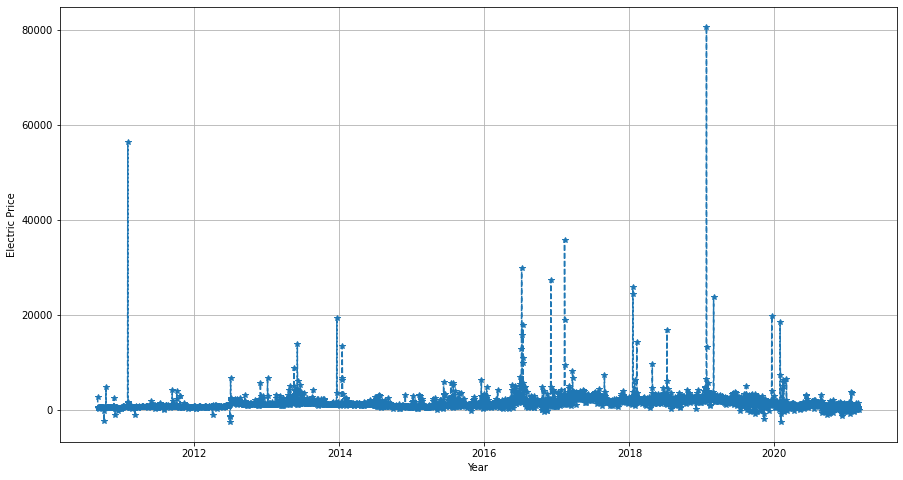

In [26]:
plt.figure(figsize=( 15 , 8 ))
plt.plot(day_data.index, day_data['ElecPrice'], '--' , marker= '*' , )
plt.grid()
plt.xlabel( 'Year' )
plt.ylabel( 'Electric Price' )

##Question 12

Using the Augmented Dicky Fuller test (ADF), what is the P-value of the SysLoad and GasPrice of the resampled Data set, to 6 decimal places?

In [27]:
sys = adfuller(day_data['SysLoad'])
gas = adfuller(day_data['GasPrice'])

print(f'p-value: {round(sys[1],6)}')
print(f'p-value: {round(gas[1],6)}')


p-value: 0.004254
p-value: 0.045027


##Question 13

Using the Augmented Dicky Fuller test (ADF) what are the 10% and 5% critical values of GasPrice and ElecPrice of the resampled Data set, to 4 decimal places?

In [28]:
elec = adfuller(day_data['ElecPrice'])

print('Critical Values:')
print(f'10% of GasPrice : {round(gas[4]["10%"],4)}')
print(f'5% of GasPrice : {round(elec[4]["5%"],4)}')

Critical Values:
10% of GasPrice : -2.5672
5% of GasPrice : -2.8623


In [29]:
train_data = day_data.iloc[:2757,:]
test_data = day_data.iloc[2757:,:]

In [30]:
train_data.reset_index(inplace = True)
train_data.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [31]:
data_train = train_data.iloc[:,[0,-1]]
data_train = data_train.rename(columns={"FullDate": "ds", "ElecPrice": "y"})
data_train.head()

,ds,y
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555


In [32]:
test_data.reset_index(inplace = True)
test_data.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2018-03-20,540.0,7696.91130,201.5880,1833.00
1,2018-03-21,571.2,4658.05865,203.2560,1730.49
2,2018-03-22,722.4,19161.78525,203.2560,2260.55
3,2018-03-23,811.2,18090.43435,198.6456,2138.76
4,2018-03-24,832.8,3763.53865,180.2160,1721.70


In [33]:
data_test = test_data.iloc[:,[0,-1]]
data_test = data_test.rename(columns={"FullDate": "ds", "ElecPrice": "y"})
data_test.head()

,ds,y
0,2018-03-20,1833.00
1,2018-03-21,1730.49
2,2018-03-22,2260.55
3,2018-03-23,2138.76
4,2018-03-24,1721.70


In [34]:
test_data = test_data.iloc[:,[0,-1]]

In [35]:
test_data = test_data.rename(columns={"FullDate": "ds", "ElecPrice": "y"})
test_data.head()

,ds,y
0,2018-03-20,1833.00
1,2018-03-21,1730.49
2,2018-03-22,2260.55
3,2018-03-23,2138.76
4,2018-03-24,1721.70


In [36]:
model = Prophet()
model.fit(data_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [37]:
forecast = model.predict(data_test) 
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,2691.764386,290.621461,4901.342404,2691.764386,2691.764386,-155.426892,-155.426892,-155.426892,9.749221,9.749221,9.749221,-165.176114,-165.176114,-165.176114,0.0,0.0,0.0,2536.337494
1,2018-03-21,2692.580955,165.757948,5020.955304,2692.580955,2692.580955,-2.925496,-2.925496,-2.925496,159.308129,159.308129,159.308129,-162.233625,-162.233625,-162.233625,0.0,0.0,0.0,2689.655459
2,2018-03-22,2693.397524,456.449510,5084.578397,2693.397524,2693.397524,95.308217,95.308217,95.308217,257.036327,257.036327,257.036327,-161.728110,-161.728110,-161.728110,0.0,0.0,0.0,2788.705741
3,2018-03-23,2694.214093,335.207765,4959.581231,2694.214093,2694.214093,-113.236873,-113.236873,-113.236873,50.257478,50.257478,50.257478,-163.494350,-163.494350,-163.494350,0.0,0.0,0.0,2580.977221
4,2018-03-24,2695.030663,-211.043697,4591.443357,2695.030663,2695.030663,-438.662722,-438.662722,-438.662722,-271.372061,-271.372061,-271.372061,-167.290660,-167.290660,-167.290660,0.0,0.0,0.0,2256.367941


In [38]:
def Metric(y_true,y_pred):
  y_true,y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred)/y_true)) *100

##Question 14

Evaluating the results of your time series model on the test set, what is the MAPE (in %) in 2 decimal places?

In [39]:
MAPE = Metric(test_data['y'],forecast['yhat'])
round(MAPE,2)

549.48

##Question 15

What is the RMSE in 2 decimal places?



In [40]:
RMSE = np.sqrt(metrics.mean_squared_error(test_data['y'],forecast['yhat']))
round(RMSE,2)

3218.16

##Question 16

If you plot the components from the forecasted model, what month of the yearly seasonality has the highest value?

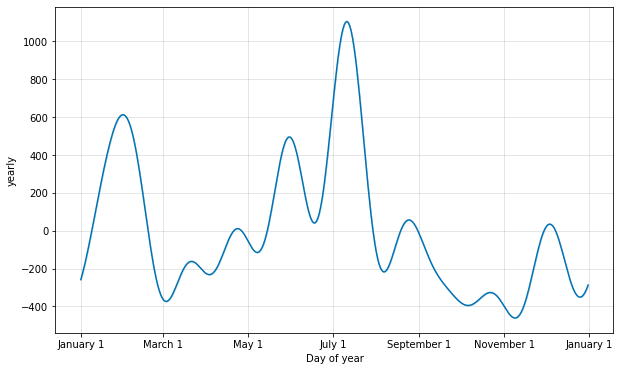

In [41]:
plot_yearly(model)

In [42]:
data.reset_index(inplace = True)
data.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [43]:
new = data.reset_index().rename(columns={"FullDate": "ds", "ElecPrice": "y", 'SysLoad': 'add1', 'Tmax': 'add2', 'GasPrice': 'add3'})

new.head()

,index,ds,add2,add1,add3,y
0,0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [44]:
train_new = new.iloc[:2757,:]
test_new = new.iloc[2757:,:]

In [45]:
model = Prophet()
model.add_regressor('add1')
model.add_regressor('add2')
model.add_regressor('add3')

In [46]:
model = model.fit(train_new)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [47]:
new_forecast = model.predict(test_new)

##Question 17
Evaluating the results of your time series model on the test set, what is the MAPE (in %) in 2 decimal places?

In [48]:
MAPE = Metric(test_new['y'],new_forecast['yhat'])
round(MAPE,2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


inf

##Question 18


What is the RMSE in 2 decimal places?

In [49]:
RMSE = np.sqrt(metrics.mean_squared_error(test_new['y'],new_forecast['yhat']))
round(RMSE,2)

1380.59

##Question 19

If you plot the components from the multivariate forecasted model, what day of the daily seasonality has the highest value?

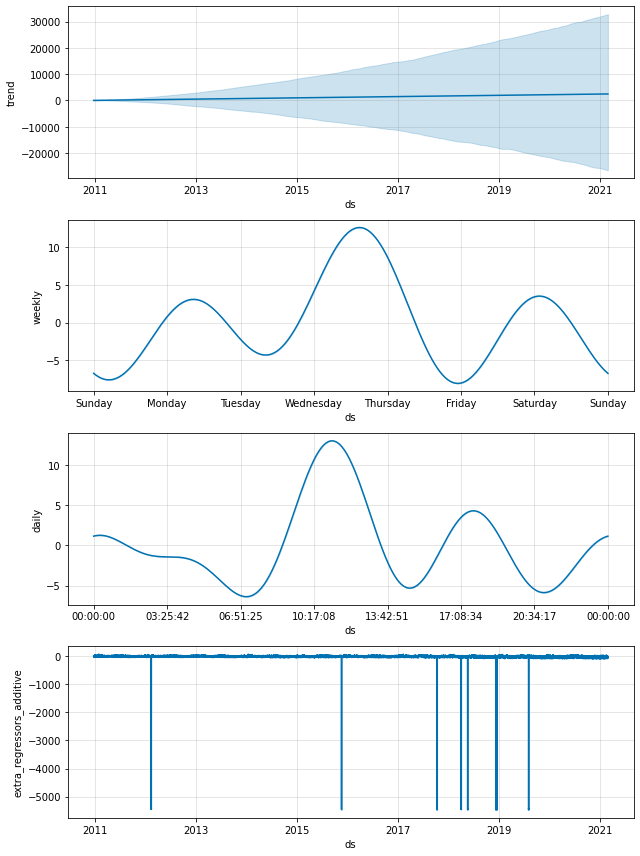

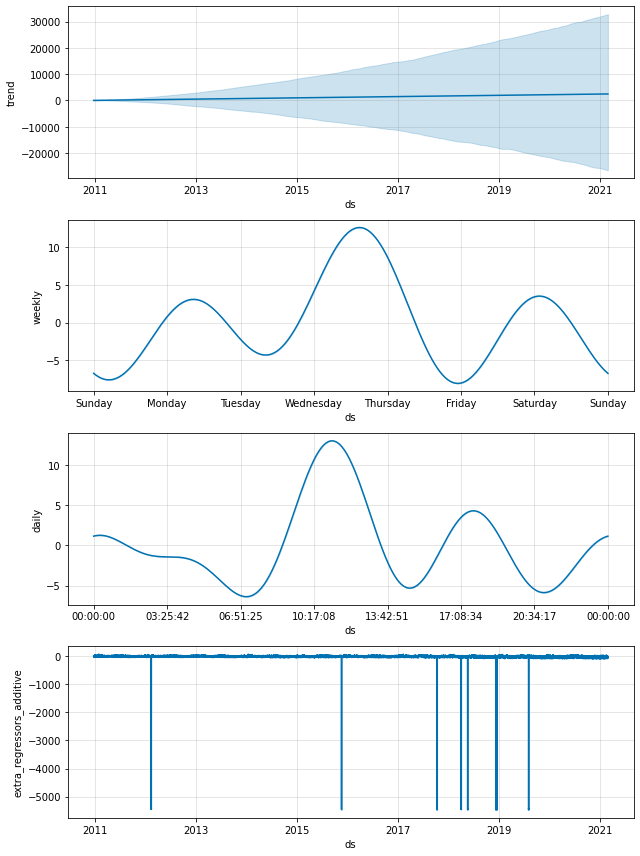

In [ ]:
model.plot_components(new_forecast)

##Question 20

Train a multivariate time series model performing the same train test split as before, but now exclude T-max from the training data(drop T-max),

What is the mean absolute percentage error (MAPE) to 2 decimal places on the test set?

In [58]:
new_data = data.rename(columns = {'FullDate':'ds','ElecPrice':'y','SysLoad':'add1','GasPrice':'add2'})
new_data.drop('Tmax', axis=1,inplace=True)

new_data.head()

,ds,add1,add2,y
0,2010-09-01 00:00:00,1688.215,3.69,23.710
1,2010-09-01 01:00:00,1669.195,3.69,22.635
2,2010-09-01 02:00:00,1491.980,3.69,22.565
3,2010-09-01 03:00:00,1330.760,3.69,18.910
4,2010-09-01 04:00:00,1247.940,3.69,18.030


In [59]:
train1 = new_data[:2757]
test1 = new_data[2757:]

In [60]:
model1 = Prophet()
model1.add_regressor('add1')
model1.add_regressor('add2')

In [61]:
model1.fit(train1)
 
forecast1 = model1.predict(test1)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [64]:
MAPE = Metric(test1['y'],forecast1['yhat'])
round(MAPE,2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


inf